In [1]:
import re

Afficher les 5 premières lignes pour avoir un aperçu des données.


In [2]:
# import pandas module 
import pandas as pd 
	
# making dataframe 
data_analyst = pd.read_csv("/Users/fredo/Documents/SIMPLON DA/DataScientist.csv") 

# output the dataframe 
data_analyst.head()


,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


Suppression de colonnes non pertinentes : supprimer les colonnes : `index`, `Rating`, `Headquarters`, `Size`, `Founded`, `Type of ownership`, `Revenue`, `Sector`, `Easy Apply`, `Competitors`, `Unnamed: 0`.


In [3]:
data_clean = data_analyst.drop(['index', 'Rating', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Revenue', 'Sector', 'Easy Apply', 'Competitors', 'Unnamed: 0'], axis=1)
data_clean




,Job Title,Salary Estimate,Job Description,Company Name,Location,Industry
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",Hopper\n3.5,"New York, NY",Travel Agencies
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",Noom US\n4.5,"New York, NY","Health, Beauty, & Fitness"
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,Decode_M,"New York, NY",-1
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital\n3.4,"Lyndhurst, NJ",Internet
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",United Entertainment Group\n3.4,"New York, NY",Advertising & Marketing
...,...,...,...,...,...,...
3904,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,Tachyon Technologies\n4.4,"Dublin, OH",IT Services
3905,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...","Staffigo Technical Services, LLC\n5.0","Columbus, OH",IT Services
3906,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,"PDS Tech, Inc.\n3.8","Dublin, OH",Staffing & Outsourcing
3907,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,Data Resource Technologies\n4.0,"Dublin, OH",Accounting


Nettoyage de la colonne 'Salary Estimate' :
Identifier et afficher le nombre de lignes où la colonne 'Salary Estimate' ne respecte pas le format :  `$chiffre_minK-$chiffre_maxK (texte)`. 
Supprimer ces lignes.


In [4]:
data_clean['Ligne'] = range(len(data_clean))
jobliste = data_clean['Ligne'].tolist()
salaireliste= data_clean['Salary Estimate'].tolist()
jobsalaire = {jobliste[i]: salaireliste[i] for i in range(len(jobliste))}
#len(jobsalaire.keys())
#jobsalaire
res = {key: val for key, val in jobsalaire.items() if not re.search("[$]\d*.[-][$]\d*.\s[(]\D*[)]", val)}
#print(len(res.keys()))

ligne_a_supprimer=list(res.keys())
ligne_a_supprimer

new_data = data_clean[~data_clean.Ligne.isin(ligne_a_supprimer)]
new_data.info()

#data_clean

<class 'pandas.core.frame.DataFrame'>
Index: 3829 entries, 0 to 3908
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        3829 non-null   object
 1   Salary Estimate  3829 non-null   object
 2   Job Description  3829 non-null   object
 3   Company Name     3829 non-null   object
 4   Location         3829 non-null   object
 5   Industry         3829 non-null   object
 6   Ligne            3829 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 239.3+ KB


Suppression de lignes non pertinentes : supprimer toutes les lignes où la colonne 'Industry' contient la valeur `-1`.

In [5]:
ind = data_clean[~data_clean.Industry.isin(["-1"])]
ind

,Job Title,Salary Estimate,Job Description,Company Name,Location,Industry,Ligne
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",Hopper\n3.5,"New York, NY",Travel Agencies,0
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",Noom US\n4.5,"New York, NY","Health, Beauty, & Fitness",1
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital\n3.4,"Lyndhurst, NJ",Internet,3
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",United Entertainment Group\n3.4,"New York, NY",Advertising & Marketing,4
5,Data Scientist,$111K-$181K (Glassdoor est.),Job Brief\n\nThe ideal candidate will have pre...,IFG Companies\n2.9,"New York, NY",Insurance Carriers,5
...,...,...,...,...,...,...,...
3904,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,Tachyon Technologies\n4.4,"Dublin, OH",IT Services,3904
3905,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...","Staffigo Technical Services, LLC\n5.0","Columbus, OH",IT Services,3905
3906,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,"PDS Tech, Inc.\n3.8","Dublin, OH",Staffing & Outsourcing,3906
3907,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,Data Resource Technologies\n4.0,"Dublin, OH",Accounting,3907


Gestion des valeurs nulles et manquantes : identifier et traiter les valeurs nulles ou manquantes selon la stratégie appropriée (imputation, suppression, etc.).


In [6]:
ind.isnull().sum()

Job Title          0
Salary Estimate    0
Job Description    0
Company Name       0
Location           0
Industry           0
Ligne              0
dtype: int64

Transformation des titres de postes :
Transformer la valeur de la colonne `Job Title` selon les sous-chaînes spécifiques :
En `Data Analyst` si contient `analyst`.
En `Data Scientist` si contient `scientist` ou `science`.
En `Data Engineer` si contient `engineer`.


In [7]:
ind.loc[ind['Job Title'].str.contains('analyst', case=False), 'Job Title'] = 'Data Analyst'
ind.loc[(ind['Job Title'].str.contains('scientist', case=False)) | (ind['Job Title'].str.contains('science', case=False)), 'Job Title'] = 'Data Scientist'
ind.loc[ind['Job Title'].str.contains('engineer', case=False), 'Job Title'] = 'Data Engineer'
ind

,Job Title,Salary Estimate,Job Description,Company Name,Location,Industry,Ligne
0,Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",Hopper\n3.5,"New York, NY",Travel Agencies,0
1,Data Scientist,$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",Noom US\n4.5,"New York, NY","Health, Beauty, & Fitness",1
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital\n3.4,"Lyndhurst, NJ",Internet,3
4,Data Scientist,$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",United Entertainment Group\n3.4,"New York, NY",Advertising & Marketing,4
5,Data Scientist,$111K-$181K (Glassdoor est.),Job Brief\n\nThe ideal candidate will have pre...,IFG Companies\n2.9,"New York, NY",Insurance Carriers,5
...,...,...,...,...,...,...,...
3904,Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,Tachyon Technologies\n4.4,"Dublin, OH",IT Services,3904
3905,Data Analyst,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...","Staffigo Technical Services, LLC\n5.0","Columbus, OH",IT Services,3905
3906,Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,"PDS Tech, Inc.\n3.8","Dublin, OH",Staffing & Outsourcing,3906
3907,Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,Data Resource Technologies\n4.0,"Dublin, OH",Accounting,3907


Filtrage des catégories de métiers : garder uniquement les lignes correspondant aux catégories `Data Analyst`, `Data Scientist` et `Data Engineer`.


In [8]:
ind['Job Title'].value_counts()

Job Title
Data Scientist                                                  1664
Data Analyst                                                     762
Data Engineer                                                    716
Data Modeler                                                      13
Quantitative Researcher                                           10
                                                                ... 
Publicis Media - Senior Data Consultant (m/f/d) - Düsseldorf       1
Senior Quantitative Researcher, Strategy Developer, Buy-Side       1
Informatica Data Modeler                                           1
Senior Google Analytics Manager                                    1
Sr Data Modeler                                                    1
Name: count, Length: 150, dtype: int64

In [9]:
final = ind.rename(columns={'Job Title': 'JobTitle'})
finale = final[final.JobTitle.isin(["Data Analyst", "Data Scientist", "Data Engineer"])]
finale

,JobTitle,Salary Estimate,Job Description,Company Name,Location,Industry,Ligne
0,Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",Hopper\n3.5,"New York, NY",Travel Agencies,0
1,Data Scientist,$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",Noom US\n4.5,"New York, NY","Health, Beauty, & Fitness",1
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital\n3.4,"Lyndhurst, NJ",Internet,3
4,Data Scientist,$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",United Entertainment Group\n3.4,"New York, NY",Advertising & Marketing,4
5,Data Scientist,$111K-$181K (Glassdoor est.),Job Brief\n\nThe ideal candidate will have pre...,IFG Companies\n2.9,"New York, NY",Insurance Carriers,5
...,...,...,...,...,...,...,...
3904,Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,Tachyon Technologies\n4.4,"Dublin, OH",IT Services,3904
3905,Data Analyst,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...","Staffigo Technical Services, LLC\n5.0","Columbus, OH",IT Services,3905
3906,Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,"PDS Tech, Inc.\n3.8","Dublin, OH",Staffing & Outsourcing,3906
3907,Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,Data Resource Technologies\n4.0,"Dublin, OH",Accounting,3907


Transformation de la colonne 'Salary Estimate' :
Remplacer `K` par `000`.
Extraire les valeurs minimales et maximales des salaires et les diviser en deux colonnes : `Estimate Min Salary` et `Estimate Max Salary`.
Supprimer la colonne `Salary Estimate`.


In [10]:
finale['Salary Estimate'] = finale['Salary Estimate'].replace(to_replace=r'[kK]', value='000', regex=True)

salairemin = finale

salairemin['Estimate Min Salary'] = salairemin['Salary Estimate'].str.extract("(\d+)")

salairemax=finale

salairemax['Estimate Max Salary'] = salairemax['Salary Estimate'].str.extract("(\d+\s)")


sansestim = salairemax.drop(columns=['Salary Estimate'])
sansestim


/var/folders/51/3vd1ttn53fz45k2v19tw2q7c0000gn/T/ipykernel_4404/406374034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finale['Salary Estimate'] = finale['Salary Estimate'].replace(to_replace=r'[kK]', value='000', regex=True)
/var/folders/51/3vd1ttn53fz45k2v19tw2q7c0000gn/T/ipykernel_4404/406374034.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salairemin['Estimate Min Salary'] = salairemin['Salary Estimate'].str.extract("(\d+)")
/var/folders/51/3vd1ttn53fz45k2v19tw2q7c0000gn/T/ipykernel_4404/40

,JobTitle,Job Description,Company Name,Location,Industry,Ligne,Estimate Min Salary,Estimate Max Salary
0,Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",Hopper\n3.5,"New York, NY",Travel Agencies,0,111000,181000
1,Data Scientist,"At Noom, we use scientifically proven methods ...",Noom US\n4.5,"New York, NY","Health, Beauty, & Fitness",1,111000,181000
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital\n3.4,"Lyndhurst, NJ",Internet,3,111000,181000
4,Data Scientist,"Director, Data Science - (200537)\nDescription...",United Entertainment Group\n3.4,"New York, NY",Advertising & Marketing,4,111000,181000
5,Data Scientist,Job Brief\n\nThe ideal candidate will have pre...,IFG Companies\n2.9,"New York, NY",Insurance Carriers,5,111000,181000
...,...,...,...,...,...,...,...,...
3904,Data Engineer,About Us\n\nTachyon Technologies is a Digital ...,Tachyon Technologies\n4.4,"Dublin, OH",IT Services,3904,55000,112000
3905,Data Analyst,"Job description\nInterpret data, analyze resul...","Staffigo Technical Services, LLC\n5.0","Columbus, OH",IT Services,3905,55000,112000
3906,Data Engineer,Job DescriptionThe Security Analytics Data Eng...,"PDS Tech, Inc.\n3.8","Dublin, OH",Staffing & Outsourcing,3906,55000,112000
3907,Data Engineer,The Security Analytics Data Engineer will inte...,Data Resource Technologies\n4.0,"Dublin, OH",Accounting,3907,55000,112000


Extraction de la colonne 'Company Name' : extraire la partie avant le caractère `\n`.

In [11]:
company = sansestim
company['Company Name'] = company['Company Name'].str.split('\n').str[0]
company

,JobTitle,Job Description,Company Name,Location,Industry,Ligne,Estimate Min Salary,Estimate Max Salary
0,Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",Hopper,"New York, NY",Travel Agencies,0,111000,181000
1,Data Scientist,"At Noom, we use scientifically proven methods ...",Noom US,"New York, NY","Health, Beauty, & Fitness",1,111000,181000
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital,"Lyndhurst, NJ",Internet,3,111000,181000
4,Data Scientist,"Director, Data Science - (200537)\nDescription...",United Entertainment Group,"New York, NY",Advertising & Marketing,4,111000,181000
5,Data Scientist,Job Brief\n\nThe ideal candidate will have pre...,IFG Companies,"New York, NY",Insurance Carriers,5,111000,181000
...,...,...,...,...,...,...,...,...
3904,Data Engineer,About Us\n\nTachyon Technologies is a Digital ...,Tachyon Technologies,"Dublin, OH",IT Services,3904,55000,112000
3905,Data Analyst,"Job description\nInterpret data, analyze resul...","Staffigo Technical Services, LLC","Columbus, OH",IT Services,3905,55000,112000
3906,Data Engineer,Job DescriptionThe Security Analytics Data Eng...,"PDS Tech, Inc.","Dublin, OH",Staffing & Outsourcing,3906,55000,112000
3907,Data Engineer,The Security Analytics Data Engineer will inte...,Data Resource Technologies,"Dublin, OH",Accounting,3907,55000,112000


Extraction de la colonne 'Location' : extraire la partie avant le caractère `,`.

In [12]:
company['Location'] = company['Location'].str.split(',').str[0]
company

,JobTitle,Job Description,Company Name,Location,Industry,Ligne,Estimate Min Salary,Estimate Max Salary
0,Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",Hopper,New York,Travel Agencies,0,111000,181000
1,Data Scientist,"At Noom, we use scientifically proven methods ...",Noom US,New York,"Health, Beauty, & Fitness",1,111000,181000
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital,Lyndhurst,Internet,3,111000,181000
4,Data Scientist,"Director, Data Science - (200537)\nDescription...",United Entertainment Group,New York,Advertising & Marketing,4,111000,181000
5,Data Scientist,Job Brief\n\nThe ideal candidate will have pre...,IFG Companies,New York,Insurance Carriers,5,111000,181000
...,...,...,...,...,...,...,...,...
3904,Data Engineer,About Us\n\nTachyon Technologies is a Digital ...,Tachyon Technologies,Dublin,IT Services,3904,55000,112000
3905,Data Analyst,"Job description\nInterpret data, analyze resul...","Staffigo Technical Services, LLC",Columbus,IT Services,3905,55000,112000
3906,Data Engineer,Job DescriptionThe Security Analytics Data Eng...,"PDS Tech, Inc.",Dublin,Staffing & Outsourcing,3906,55000,112000
3907,Data Engineer,The Security Analytics Data Engineer will inte...,Data Resource Technologies,Dublin,Accounting,3907,55000,112000


Analyse des compétences requises : compter le nombre de postes contenant les sous-chaînes suivantes : `sql`, `python`, `power bi`, `tableau`, `excel`, `r`. Supposons que ce soient les compétences dont nous souhaitons trouver la fréquence d’apparition dans chacune des trois catégories d’emploi. 


In [13]:
sql = company['Job Description'].str.contains('sql', case=False).sum()
python = company['Job Description'].str.contains('python', case=False).sum()
powerbi = company['Job Description'].str.contains('power bi', case=False).sum()
tableau = company['Job Description'].str.contains('tableau', case=False).sum()
excel = company['Job Description'].str.contains('excel', case=False).sum()
r = company['Job Description'].str.contains(' r ', case=False).sum()


total = [sql, python, powerbi, tableau, excel, r]
total

[1614, 1696, 165, 534, 1485, 256]

In [14]:
new_data = company[['JobTitle', 'Job Description']].copy()

new_data.insert(0, "sql", 0)
new_data.insert(0, "python", 0)
new_data.insert(0, "powerbi", 0)
new_data.insert(0, "tableau", 0)
new_data.insert(0, "excel", 0)
new_data.insert(0, "r", 0)

new_data.loc[new_data['Job Description'].str.contains('sql', case=False), 'sql'] = 1
new_data.loc[new_data['Job Description'].str.contains('python', case=False), 'python'] = 1
new_data.loc[new_data['Job Description'].str.contains('powerbi', case=False), 'powerbi'] = 1
new_data.loc[new_data['Job Description'].str.contains('tableau', case=False), 'tableau'] = 1
new_data.loc[new_data['Job Description'].str.contains('excel', case=False), 'excel'] = 1
new_data.loc[new_data['Job Description'].str.contains(' r ', case=False), 'r'] = 1


group = new_data.groupby(['JobTitle']).sum()

group.drop(columns=['Job Description'])

,r,excel,tableau,powerbi,python,sql
JobTitle,,,,,,
Data Analyst,61,466,247,29,245,510
Data Engineer,40,247,112,15,517,476
Data Scientist,155,772,175,18,934,628


Proposer une visualiser du résultat 


<Axes: xlabel='JobTitle'>

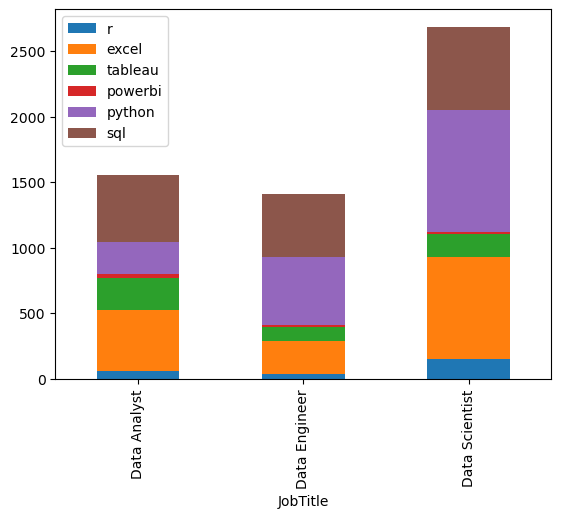

In [15]:
group.plot(kind='bar', stacked=True)